In [1]:
import control as ct
from control.matlab import *

In [2]:
import matplotlib.pyplot as plt

In [3]:
G = ct.tf([-1, 1], [1, 1])

In [4]:
print(G)

<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


-s + 1
------
s + 1



/home/hongbin/.pyenv/versions/3.10.14/lib/python3.10/site-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


AttributeError: 'tuple' object has no attribute 'plot'

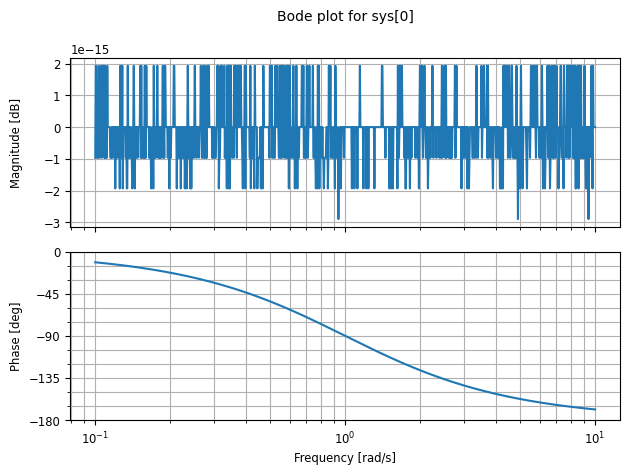

In [6]:
bode(G).plot()

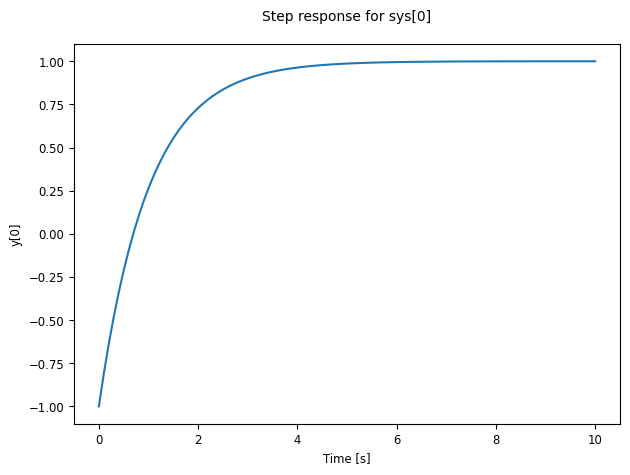

In [12]:
ct.step_response(G, T=10).plot()

In [13]:
kc1=0.2; kc2=0.5; kc3=0.8;

In [16]:
K1=ct.series(ct.tf([1, 1], [1, 0]), ct.tf([kc1], [0.05, 1])); print(K1)

<TransferFunction>: sys[15]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.2 s + 0.2
------------
0.05 s^2 + s



In [17]:
K2=ct.series(ct.tf([1, 1], [1, 0]), ct.tf([kc2], [0.05, 1])); print(K2)

<TransferFunction>: sys[18]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.5 s + 0.5
------------
0.05 s^2 + s



In [18]:
K3=ct.series(ct.tf([1, 1], [1, 0]), ct.tf([kc3], [0.05, 1])); print(K3)

<TransferFunction>: sys[21]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.8 s + 0.8
------------
0.05 s^2 + s



In [19]:
Loop1 = ct.series(K1, G); Loop2 = ct.series(K2, G); Loop3 = ct.series(K3, G);

In [21]:
S1 = ct.feedback(1, Loop1, name="S1"); S2 = ct.feedback(1, Loop2, name="S2"); S3 = ct.feedback(1, Loop3, name="S3");

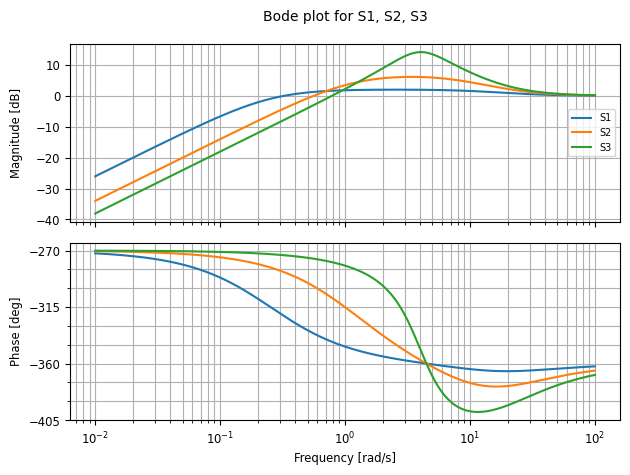

In [25]:
ct.bode([S1, S2, S3])

In [30]:
T1 = ct.feedback(Loop1, 1, name="T1"); T2 = ct.feedback(Loop2, 1, name="T2"); T3 = ct.feedback(Loop3, 1, name="T3");

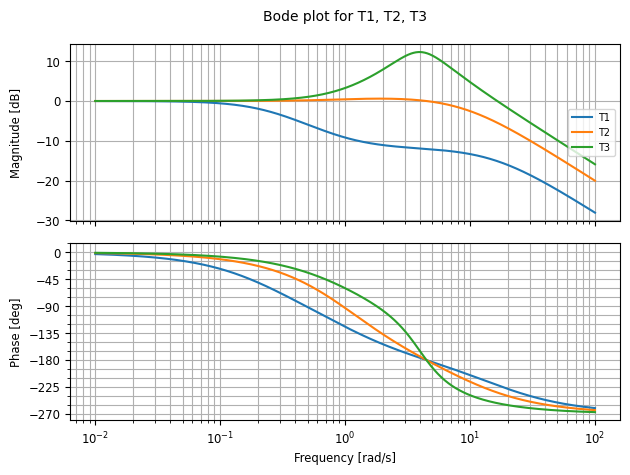

In [31]:
ct.bode([T1, T2, T3])

In [32]:
T1, YT1 = ct.step_response(T1, T=10); T2, YT2 = ct.step_response(T2, T=10); T3, YT3 = ct.step_response(T3, T=10);

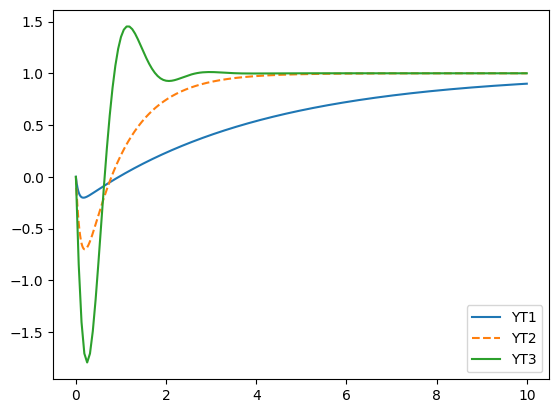

In [33]:
fig, ax=plt.subplots(); ax.plot(T1, YT1, label="YT1"); ax.plot(T2, YT2, label="YT2", linestyle="--"); ax.plot(T3, YT3, label="YT3"); plt.legend(); fig.show() 